# Kaggle: Red Wine Quality (Cortez et al. 2009)

이 노트북은 Kaggle의 Red Wine Quality 데이터셋(P. Cortez et al., 2009)을 활용하여 레드 와인의 품질을 예측하는 모델을 만드는 과정을 담고 있습니다.
데이터셋은 UCI Machine Learning Repository에서 직접 다운로드하여 사용합니다.

## 데이터셋 설명 (Dataset Description)

- **데이터셋**: Red Wine Quality Dataset
- **출처**: [Kaggle Link](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) / [UCI Link](https://archive.ics.uci.edu/ml/datasets/wine+quality)
- **데이터 개수**: 1,599개
- **특성(Features)**: 11개 (화학적 특성)
- **타겟(Target)**: quality (0에서 10 사이의 점수)

### 변수 설명 (Variables)
1. **fixed acidity** (고정 산도): 와인의 산도와 관련된 고정된 산의 양
2. **volatile acidity** (휘발성 산도): 와인에서 식초 맛을 내는 휘발성 산의 양 (너무 높으면 좋지 않음)
3. **citric acid** (구연산): 와인의 신선함을 더해주는 산
4. **residual sugar** (잔류 당분): 발효 후 남은 당분 (와인의 단맛 결정)
5. **chlorides** (염화물): 와인 내 소금의 양
6. **free sulfur dioxide** (유리 이산화황): 미생물 번식과 산화를 방지하는 SO2 형태
7. **total sulfur dioxide** (총 이산화황): 유리형과 결합형 SO2의 총합
8. **density** (밀도): 알코올 함량과 당분에 따라 달라지는 와인의 밀도
9. **pH**: 와인의 산성도 (0: 강산성 ~ 14: 강알칼리성, 보통 3-4 사이)
10. **sulphates** (황산염): 이산화황 농도에 영향을 주어 항균 및 항산화 작용을 함
11. **alcohol** (알코올 도수): 와인의 알코올 함량 (% vol)
12. **quality** (품질): 출력 변수 (0~10 사이의 점수, 3이 가장 낮고 8이 가장 높음)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

# 전처리 라이브러리
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 머신러닝 모델
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# 평가 지표
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

## 1. 데이터 로드 (Data Load)

UCI Machine Learning Repository에서 데이터를 직접 다운로드합니다.

In [ ]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# filename = "winequality-red.csv"

# try:
#     urllib.request.urlretrieve(url, filename)
#     print(f"데이터 다운로드 완료: {filename}")
# except Exception as e:
#     print(f"다운로드 실패: {e}")

In [1]:
# 1. url로 데이터 가져오기
# filename = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'

# 2. url말고 kaggle에 로그인해서 데이터셋 다운로드 (dotenv파일에 로그인api존재)
from dotenv import load_dotenv
# .env 로부터 파일을 읽으면 True 출력
load_dotenv()

True

In [3]:
#!/bin/bash
!kaggle datasets download uciml/red-wine-quality-cortez-et-al-2009

Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0




  0%|          | 0.00/25.6k [00:00<?, ?B/s]
100%|██████████| 25.6k/25.6k [00:00<00:00, 15.5MB/s]


In [5]:
# 압축파일 풀기 : C:\Users\user\github\DataScience\scikit-learn\red-wine-quality-cortez-et-al-2009.zip

import zipfile
import os
# 압축 파일 경로 (정방향 슬래시 사용)
zip_file_path = 'C:/Users/user/github/DataScience/scikit-learn/red-wine-quality-cortez-et-al-2009.zip'
# 압축을 풀 대상 디렉토리
extract_to_path = 'C:/Users/user/github/DataScience/scikit-learn/data'
# zip 파일 열기 및 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print(f"압축 해제 완료: {extract_to_path}")
# 해제된 파일 목록 확인
print("현재 폴더 파일 목록:", os.listdir(extract_to_path))

압축 해제 완료: C:/Users/user/github/DataScience/scikit-learn/data
현재 폴더 파일 목록: ['teenage_mental.xls', 'titanic', 'winequality-red.csv']


In [9]:
import pandas as pd

filename = 'C:/Users/user/github/DataScience/scikit-learn/data/winequality-red.csv'
# 세미콜론(;)으로 구분된 CSV 파일, , sep=',' -> default 값이라 안넣어줘도 됨
df = pd.read_csv(filename)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. 데이터 분석 (EDA)

In [10]:
print("### Data Info ###")
print(df.info())


### Data Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [11]:
print("\n### Missing Values ###")
print(df.isnull().sum())



### Missing Values ###
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
print("\n### Basic Statistics ###")
display(df.describe().round(2))


### Basic Statistics ###


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [17]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

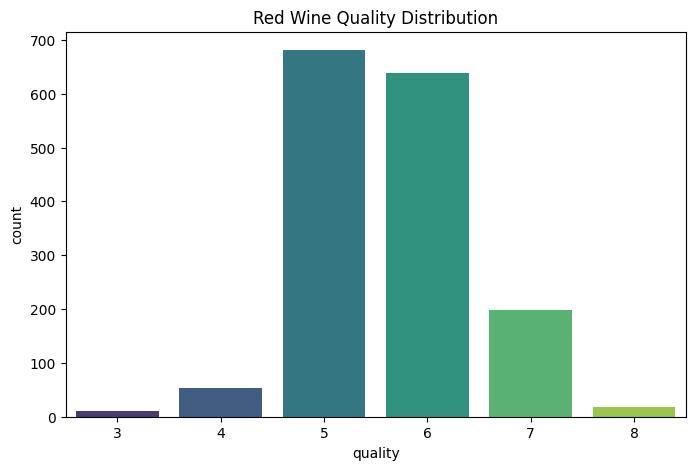

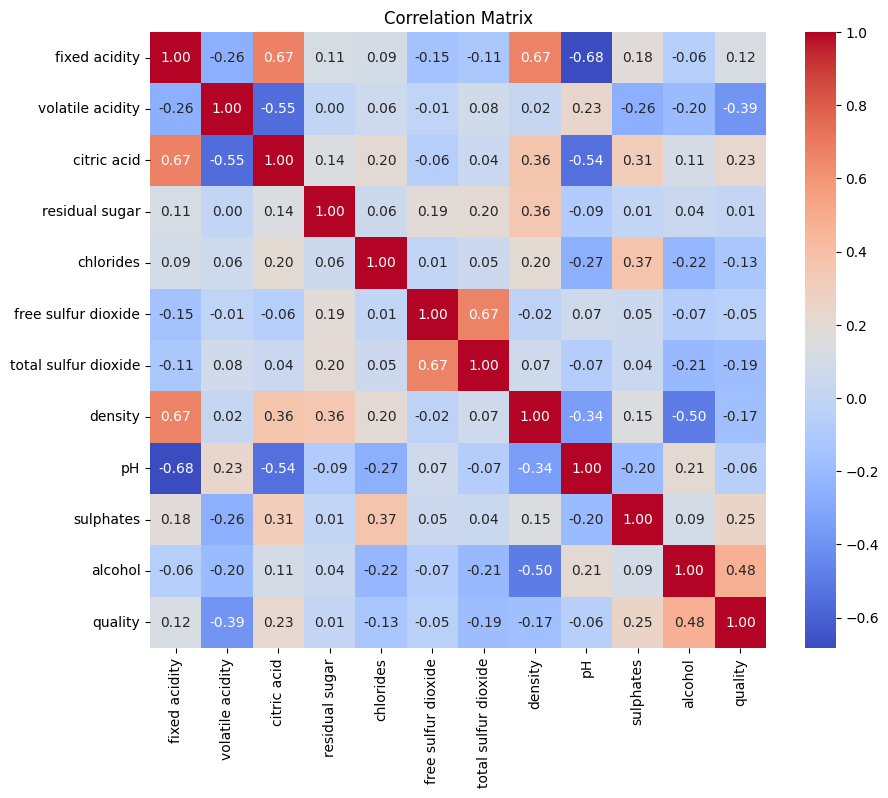

In [ ]:
# 타겟 변수(Quality) 분포 확인
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Red Wine Quality Distribution")
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()
# 3,4,8은 데이터가 얼마 없어서 정확도 낮을 확률이 높다.

## 3. 데이터 전처리 및 특성 엔지니어링

- **특성 엔지니어링**: 산도 관련 특성들을 합쳐서 `total acidity`를 만들어 봅니다 (선택 사항).
- **이진 분류 변환 (선택)**: 원래 점수(0~10)를 그대로 쓸 수도 있지만, 보통 좋은 와인(예: 7 이상)과 나쁜 와인으로 나누거나 그대로 멀티 클래스로 분류합니다. 여기서는 **멀티 클래스 분류(각 점수별 예측)**를 수행하되, 데이터가 적은 클래스(3, 8 등)를 고려해야 합니다. 
  > 여기서는 **quality 그대로를 클래스로 사용하는 멀티클래스 분류**로 진행합니다.

- **스케일링**: 대부분의 모델(SVM, KNN, Logistic 등)은 특성 스케일에 민감하므로 `StandardScaler`를 적용합니다.

In [ ]:
# 특성 엔지니어링 (예: 총 산도)
# df['total_acidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
# 이 예제에서는 원본 특성을 유지하며 진행합니다.

X = df.drop('quality', axis=1)
y = df['quality']

# 타겟 클래스 개수가 적을수록 (예: quality 3, 8) Stratified Split 사용 권장 
# -> stratify 안해주면 데이터가 적어서 test데이터로 안 들어갈 수도 있어.
# -> 그러면 y_train에 모든 y 값이 들어가면 다 정답나와부러.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train shape: {X_train_scaled.shape}, Test shape: {X_test_scaled.shape}")

Train shape: (1279, 11), Test shape: (320, 11)


In [19]:
# train 데이터에서 quality별로 몇개씩 들어갔는지 확인.
#  y_train.value_counts()

print(y_train.value_counts())
print(y_train.value_counts())



quality
5    545
6    510
7    159
4     42
8     15
3      8
Name: count, dtype: int64
quality
5    545
6    510
7    159
4     42
8     15
3      8
Name: count, dtype: int64


#####  데이터 불균형 해소 (SMOTE 적용)

데이터량이 적은 데이터 근처로 비슷한 데이터를 생성해주는 것인데<br>
학습량이 늘어 성능이 높게 나올 수도 있지만<br>
임의로 데이터를 추가하는 것이기 때문에 잘못 학습되면 성능이 더 낮아질 수도 있음

In [31]:
!pip install imbalanced-learn


   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]



In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [41]:
# y_train -> np에서 pd로 변환하여 value_counts()사용 
# 가장 갯수가 많은 데이터 갯수만큼 다 늘려
print(pd.Series(y_train[:]).value_counts())
print(pd.Series(y_train_res[:]).value_counts())

quality
5    545
6    510
7    159
4     42
8     15
3      8
Name: count, dtype: int64
quality
6    545
5    545
7    545
3    545
4    545
8    545
Name: count, dtype: int64


## 4. 모델링 (8가지 모델)

In [43]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=2000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced_subsample'),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

results = {}
print("### Initial Model Performance (Accuracy) ###")
for name, model in models.items():
    #model.fit(X_train_scaled, y_train)
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# 상위 4개 모델 선정
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
top_4_names = [item[0] for item in sorted_results[:4]]
print(f"\nTop 4 Models: {top_4_names}")

### Initial Model Performance (Accuracy) ###
LogisticRegression: 0.3656
DecisionTree: 0.5813
RandomForest: 0.6312
SVM: 0.5094
KNN: 0.5000
GradientBoosting: 0.5563
ExtraTrees: 0.6094
AdaBoost: 0.3937

Top 4 Models: ['RandomForest', 'ExtraTrees', 'DecisionTree', 'GradientBoosting']


In [ ]:
# 틀린그림찾기해야해~~~~
models = {
    'LogisticRegression': LogisticRegression(max_iter=2000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

results = {}
print("### Initial Model Performance (Accuracy) ###")
for name, model in models.items():
    # model.fit(X_train_scaled, y_train)
    # SMOTE 적용한data :  X_train_res 
    model.fit(X_train_res, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# 상위 4개 모델 선정
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
top_4_names = [item[0] for item in sorted_results[:4]]
print(f"\nTop 4 Models: {top_4_names}")

### Initial Model Performance (Accuracy) ###


ValueError: Found input variables with inconsistent numbers of samples: [3270, 1279]

## 5. 하이퍼 파라메터 튜닝 및 앙상블

상위 4개 모델에 대해 `GridSearchCV` 또는 간단한 튜닝을 수행한 후, `VotingClassifier`로 앙상블합니다.

In [44]:
# Top 4 모델 객체 가져오기
top_models = {}
for name in top_4_names:
    top_models[name] = models[name]

# 튜닝을 위한 파라미터 그리드 예시 (시간 관계상 일부만 간단히 설정)
param_grids = {
    # 'class_weight':['balanced', 'balanced_subsample', None] -> 추가하면 파라미터의 이 세개조건 다 돌려보고 성능 좋은걸로 갔다 써
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'class_weight':['balanced', 'balanced_subsample', None]},
    'ExtraTrees': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
    'SVM': {'C': [1, 10], 'gamma': ['scale', 0.1]},
    'GradientBoosting': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'DecisionTree': {'max_depth': [5, 10, None]},
    'LogisticRegression': {'C': [1, 10]},
    'AdaBoost': {'n_estimators': [50, 100]}
}

tuned_estimators = []

print("\n### Hyperparameter Tuning for Top 4 ###")
for name in top_4_names:
    if name in param_grids:
        grid = GridSearchCV(top_models[name], param_grids[name], cv=10, n_jobs=-1, scoring='accuracy')
        # grid.fit(X_train_scaled, y_train)
        # SMOTE 적용한 train data : y_train_res
        grid.fit(X_train_res, y_train_res)
        best_model = grid.best_estimator_
        print(f"{name} Best Params: {grid.best_params_}, Score: {grid.best_score_:.4f}")
        tuned_estimators.append((name, best_model))
    else:
        # 튜닝할 파라미터가 없거나 설정 안된 경우 기본 모델 사용
        tuned_estimators.append((name, top_models[name]))

# 앙상블 모델 생성 (Soft Voting)
ensemble_model = VotingClassifier(estimators=tuned_estimators, voting='soft')
ensemble_model.fit(X_train_scaled, y_train)

ensemble_pred = ensemble_model.predict(X_test_scaled)
ensemble_acc = accuracy_score(y_test, ensemble_pred)

print(f"\nEnsemble Model Test Accuracy: {ensemble_acc:.4f}")


### Hyperparameter Tuning for Top 4 ###
RandomForest Best Params: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 200}, Score: 0.8862
ExtraTrees Best Params: {'max_depth': 20, 'n_estimators': 200}, Score: 0.8988
DecisionTree Best Params: {'max_depth': None}, Score: 0.8104
GradientBoosting Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, Score: 0.8547

Ensemble Model Test Accuracy: 0.6531


## 6. 모델 평가 및 결론

### Confusion Matrix ###


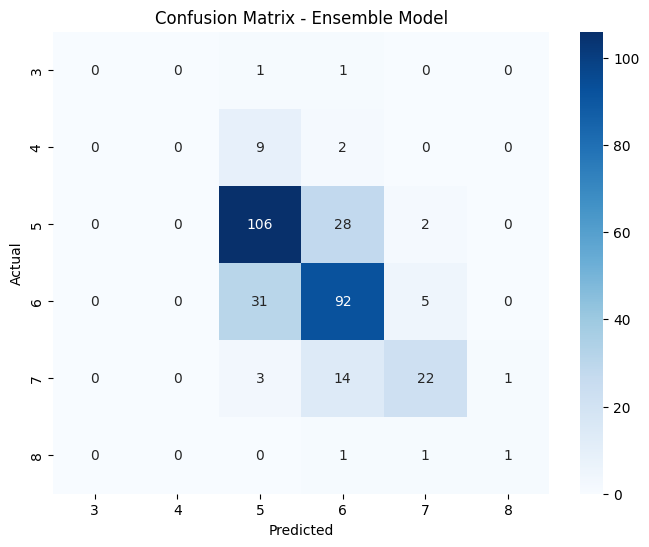

In [30]:
# 실제 클래스 라벨 추출 (3, 4, 5, 6, 7, 8)
labels = sorted(y_test.unique())

print("### Confusion Matrix ###")
cm = confusion_matrix(y_test, ensemble_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=labels,  # x축에 3~8 표시
            yticklabels=labels)  # y축에 3~8 표시
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()

### Classification Report ###
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.76      0.73       136
           6       0.66      0.73      0.69       128
           7       0.73      0.55      0.63        40
           8       0.50      0.33      0.40         3

    accuracy                           0.69       320
   macro avg       0.43      0.40      0.41       320
weighted avg       0.66      0.69      0.67       320

### Confusion Matrix ###


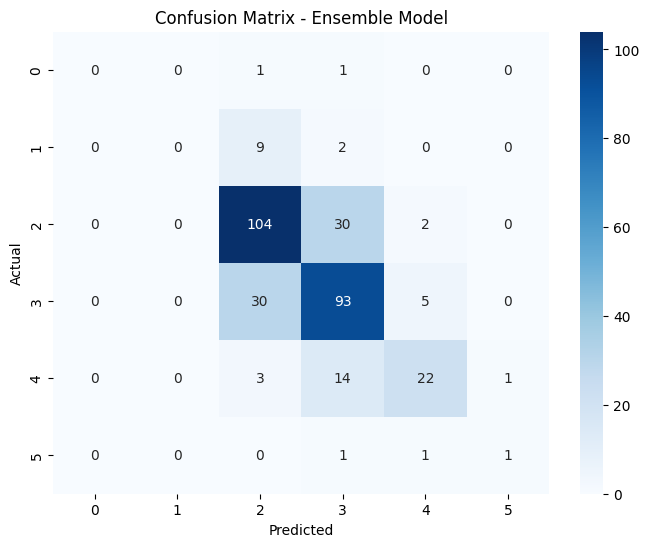

In [ ]:
#  0,1,2,3,4,5 - >로 나오는 이유 파악해보기
print("### Classification Report ###")
print(classification_report(y_test, ensemble_pred))

print("### Confusion Matrix ###")
cm = confusion_matrix(y_test, ensemble_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()